# Study of proton selections in raw ntuples
The JINST paper used two cuts : 
 - ratio of energies in MIP : CE-E / (CE-E + CE-H) > 0.95
 - number of hits in CE-H < 50
applied in ntuples v4 and v5

For ntuples v6, I have changed the cut on nb of hits in CE-H to < 80 as it was very strict

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("..")

import numpy as np
import awkward as ak
import pandas as pd
import uproot
import hist
import matplotlib.pyplot as plt
import matplotlib.ticker
import mplhep as hep
plt.style.use(hep.style.CMS)

from ntupleReaders.raw_ntuple_reader import RawNtupleReader, getAllRawNtupleReaders
from ntupleReaders.computation import BaseComputation, computeAllFromTree

In [2]:
os.environ["X509_USER_PROXY"] = "~/.t3/proxy.cert"
#reader = RawNtupleReader("v46", 0, 50)
reader = RawNtupleReader("data", 676)

In [5]:
reader.getHitsTree().keys()

['event',
 'trigger_timestamp',
 'run',
 'pdgID',
 'beamEnergy',
 'trueBeamEnergy',
 'energyLostEE',
 'energyLostFH',
 'energyLostBH',
 'energyLostBeam',
 'energyLostOutside',
 'NRechits',
 'rechit_detid',
 'rechit_module',
 'rechit_layer',
 'rechit_chip',
 'rechit_channel',
 'rechit_type',
 'rechit_x',
 'rechit_y',
 'rechit_z',
 'rechit_iu',
 'rechit_iv',
 'rechit_iU',
 'rechit_iV',
 'rechit_energy',
 'rechit_energy_noHG',
 'rechit_amplitudeHigh',
 'rechit_amplitudeLow',
 'rechit_hg_goodFit',
 'rechit_lg_goodFit',
 'rechit_hg_saturated',
 'rechit_lg_saturated',
 'rechit_fully_calibrated',
 'rechit_noise_flag',
 'rechit_TS2High',
 'rechit_TS2Low',
 'rechit_TS3High',
 'rechit_TS3Low',
 'rechit_Tot',
 'rechit_toa_calib_flag',
 'rechit_toaFall_flag',
 'rechit_toaRise_flag',
 'rechit_toaFall_norm',
 'rechit_toaRise_norm',
 'rechit_toaFall_time',
 'rechit_toaRise_time',
 'rechit_toaFall_corr_time',
 'rechit_toaRise_corr_time',
 'rechit_calib_time_toaFall',
 'rechit_calib_time_toaRise',
 're

In [13]:
ar = reader.getHitsTree().arrays(entry_stop=1000)

In [6]:
pd.options.display.min_rows = 50
ak.to_dataframe(ar[['energyLostEE',
 'energyLostFH',
 'energyLostBH',
 'energyLostBeam',
 'energyLostOutside',
 'ahc_energySum'
 ]])

,energyLostEE,energyLostFH,energyLostBH,energyLostBeam,energyLostOutside
entry,,,,,
0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
def computeRatio(ar):
    energy_cee = ak.sum(ar.rechit_energy[ar.rechit_layer <= 28], axis=-1)
    energy_total = ak.sum(ar.rechit_energy, axis=-1)
    return energy_cee / energy_total

def computeHadronicHitCount(ar):
    return ak.count_nonzero(ar.rechit_layer > 29, axis=-1)

In [28]:
computeHadronicHitCount(ar).to_numpy()

array([ 44,  39,  45,  34,  54,  47,  45,  48,  40,  47,  43,  42,  47,
        43,  51,  55,  35,  51,  44,  38,  40,  56,  57,  44,  46,  47,
        48,  44,  58,  47,  57,  48,  46,  51,  41,  45,  42,  59,  45,
        52,  44,  50,  52,  43,  43,  47,  39,  40,  41,  41,  52,  39,
        41,  47,  50,  47,  58,  41,  39,  46,  49,  71,  67,  48,  41,
        55,  39,  43,  41,  39,  50,  37,  45,  48,  42,  38,  49,  39,
        46,  37,  49,  39,  38,  45,  47,  46,  52,  51,  50,  41, 264,
        33,  45,  43,  47,  48,  52,  45,  45,  51,  52,  44,  36,  48,
        39,  39,  44,  47,  47,  56,  47,  52,  56,  43,  42,  48,  50,
        41,  33,  51,  56,  52,  41,  47,  43,  53,  43,  52,  37,  59,
        49,  46,  44,  49,  41,  54,  57,  36,  38,  56,  45,  42,  38,
        49,  35,  38,  48,  48,  42,  41,  46,  42,  42,  48,  43,  44,
        58,  40,  50,  54,  40,  40,  37,  45,  42,  49,  51,  36,  48,
        48,  41,  57,  44,  45,  57,  40,  43,  45,  52,  43,  5

In [20]:
np.histogram_bin_edges(computeHadronicHitCount(ar).to_numpy(), bins=40)

array([ 29.  ,  38.15,  47.3 ,  56.45,  65.6 ,  74.75,  83.9 ,  93.05,
       102.2 , 111.35, 120.5 , 129.65, 138.8 , 147.95, 157.1 , 166.25,
       175.4 , 184.55, 193.7 , 202.85, 212.  , 221.15, 230.3 , 239.45,
       248.6 , 257.75, 266.9 , 276.05, 285.2 , 294.35, 303.5 , 312.65,
       321.8 , 330.95, 340.1 , 349.25, 358.4 , 367.55, 376.7 , 385.85,
       395.  ])

In [33]:
import awkward as ak


class RatioComp(BaseComputation):
    """ Computes the ratio between energy in CE-E and (energy in CE-E + energy in CE-H) """
    neededBranches = ["rechit_energy", "rechit_layer"]

    def __init__(self, filterAhcEnergySum=False, axisType="variable"):
        self.filterAhcEnergySum = filterAhcEnergySum
        if filterAhcEnergySum:
            self.neededBranches = RatioComp.neededBranches + ["ahc_energySum"]
        
        axis_label_kwargs = dict(name="ratio_cee_total", label="Ratio energy in CE-E / (energy in CE-E+CE-H) (in MIPs)")
        if axisType == "regular":
            ratioAxis = hist.axis.Regular(bins=500, start=0.5, stop=1.000001, **axis_label_kwargs)
        elif axisType == "variable":
            #self.h = hist.Hist(hist.axis.Variable([-0.1, 0., 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 
            #    0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0000001], **axis_label_kwargs))
            # bins computed by np.histogram_bin_edges(ratios[~np.isnan(ratios)], bins=40)
            ratioAxis = hist.axis.Variable([0., 0.02292092, 0.0473479 , 0.07177487, 0.09620185, 0.12062883,
                0.1450558 , 0.16948278, 0.19390976, 0.21833673, 0.24276371,
                0.2671907 , 0.29161766, 0.31604466, 0.34047163, 0.3648986 ,
                0.3893256 , 0.41375256, 0.43817952, 0.46260652, 0.4870335 ,
                0.5114605 , 0.5358874 , 0.5603144 , 0.5847414 , 0.60916835,
                0.63359535, 0.65802234, 0.6824493 , 0.7068763 , 0.7313033 ,
                0.7557302 , 0.7801572 , 0.8045842 , 0.82901114, 0.85343814,
                0.87786514, 0.9022921 , 0.92671907, 0.95114607, 0.975573  ,
                1.0000001        ], **axis_label_kwargs)
        else:
            assert False
        
        self.h = hist.Hist(ratioAxis, hist.axis.Variable([0., 20., 30., 40., 50., 60., 70., 80., 100., 200., 300., 500., 1000], name="ce_h_hitCount", label="Number of hits in CE-H"))

    def process(self, array:ak.Array):
        if self.filterAhcEnergySum:
            array = array[array.ahc_energySum == 0]
        ratios = ak.to_numpy(computeRatio(array))
        self.h.fill(ratios[~np.isnan(ratios)], ak.to_numpy(computeHadronicHitCount(array))[~np.isnan(ratios)]) # remove nans, they are caused by empty events
    

class FindRatioOutliers(BaseComputation):
    neededBranches = ["rechit_energy", "rechit_layer", "event"]
    def process(self, array: ak.Array) -> None:
        ratio = computeRatio(ar)
        cut = (ratio < 0) | (ratio > 1)
        events = array.event[cut]
        if ak.count_nonzero(cut) > 0:
            print(events)
            print(ratio[cut])

class HadronicHitsCount(BaseComputation):
    """ Compute the number of hits in the CE-H """
    neededBranches = ["rechit_layer"]
    def __init__(self) -> None:
        self.h = hist.Hist(hist.axis.Variable([0., 20., 30., 40., 50., 60., 70., 80., 100., 200., 300., 500., 1000], name="ce_h_hitCount", label="Number of hits in CE-H"))

    def process(self, array: ak.Array) -> None:
        self.h.fill(computeHadronicHitCount(array))

In [46]:
ntupleReaders = getAllRawNtupleReaders("data", 300)

In [34]:
ratioComp = RatioComp()
computeAllFromTree(map(lambda x : x.getHitsTree(), ntupleReaders), [ratioComp], count=len(ntupleReaders))

100%|██████████| 10/10 [00:35<00:00,  3.56s/it]


In [47]:
computeAllFromTree(map(lambda x : x.getHitsTree(), ntupleReaders), [FindRatioOutliers()], count=len(ntupleReaders))

100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


In [47]:
hadronicHitsCount = HadronicHitsCount()
computeAllFromTree(map(lambda x : x.getHitsTree(), ntupleReaders), [hadronicHitsCount], count=len(ntupleReaders))

100%|██████████| 1/1 [00:05<00:00,  5.20s/it]


(0.0, 100.0)

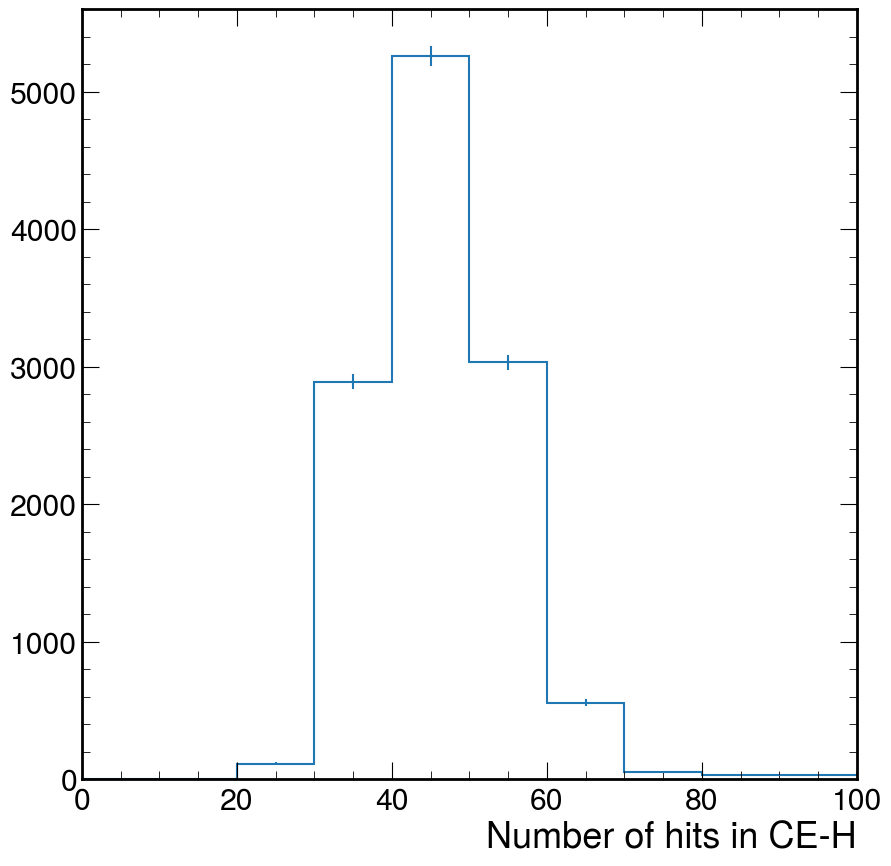

In [48]:
hep.histplot(hadronicHitsCount.h)
plt.xlim(0, 100)

(0.0, 500.0)

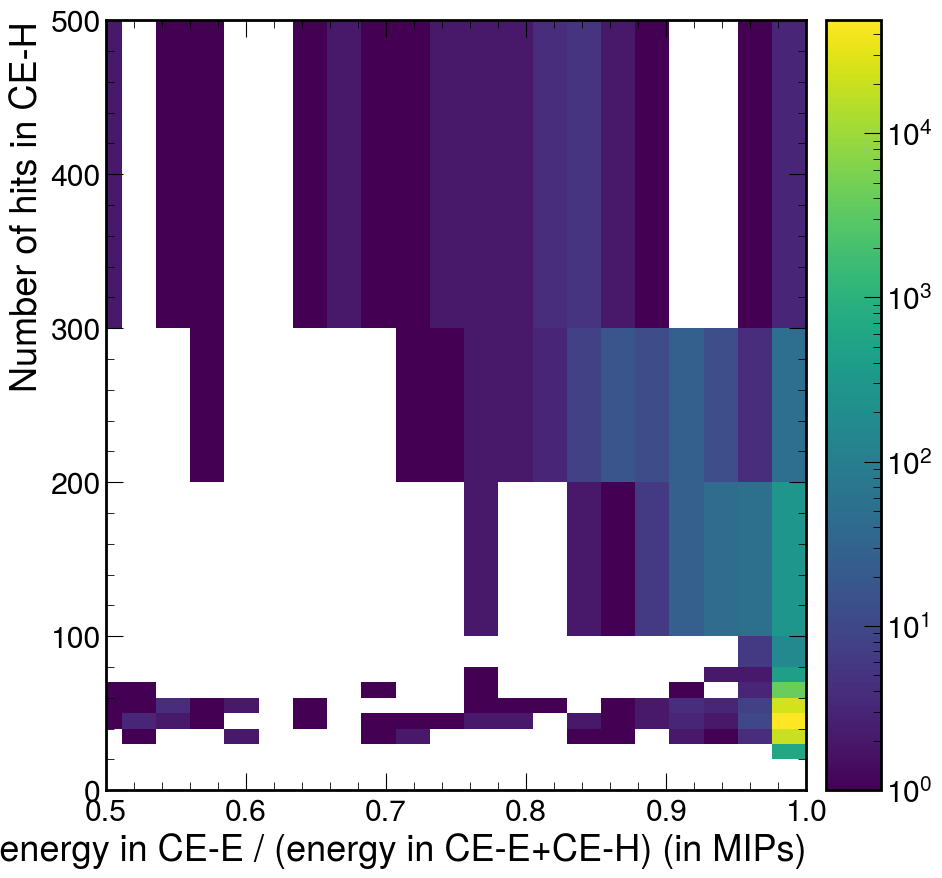

In [42]:
import matplotlib as mpl
hep.hist2dplot(ratioComp.h, norm=mpl.colors.LogNorm())
#plt.xscale("log")
plt.xlim(0.5, 1)
plt.ylim(0, 500)

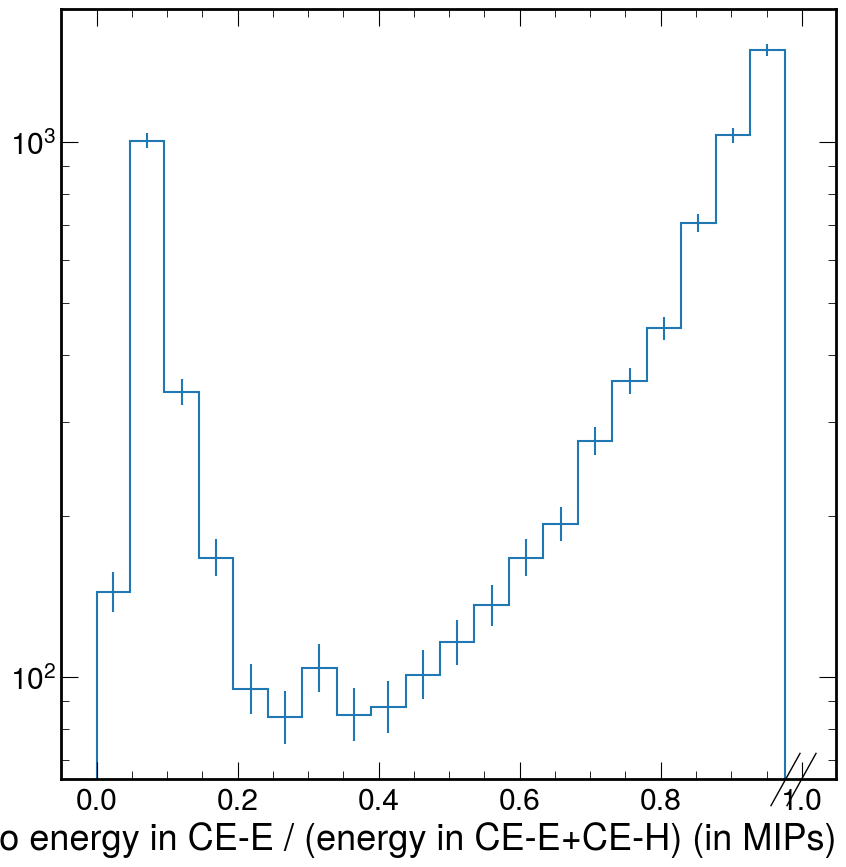

In [95]:

hep.histplot(ratioComp.h[::hist.tag.rebin(2)])
plt.yscale("log")
#plt.xlim(0, 1)



In [35]:
def plotMultiBeamEnergyOverlaid(hists:dict[int, hist.Hist], datatype=None, lumiText=None):
    fig, ax = plt.subplots()

    hep.histplot(list(hists.values()), label=[f"{energy} GeV" for energy in hists], yerr=False)

    ax.set_yscale("log")
    ax.set_xlabel("Ratio of energies (in MIP) CE-E / (CE-E+CE-H)")
    ax.set_ylabel("Events")
    if datatype is None or datatype == "data":
        hep.cms.text("Preliminary", ax=ax)
    else:
        hep.cms.text("Simulation Preliminary", ax=ax, fontsize=15)
    
    if lumiText is not None:
        hep.cms.lumitext(lumiText + " TB", ax=ax, fontsize=9)
    else:
        hep.cms.lumitext("TB", ax=ax)
    ax.legend()
    

In [12]:
def makeMultiBeamEnergyPlots(datatype, ratioCompParam=dict(), plotParams=dict()):
    ratioComps = {}
    for beamEnergy in [20, 50, 100, 200]:
        ntupleReaders = getAllRawNtupleReaders(datatype, beamEnergy)
        ratioComps[beamEnergy] = RatioComp(**ratioCompParam)
        computeAllFromTree(map(lambda x : x.getHitsTree(), ntupleReaders), [ratioComps[beamEnergy]], count=len(ntupleReaders))

    plotMultiBeamEnergyOverlaid({energy : ratioComp.h.project("ratio_cee_total") for energy, ratioComp in ratioComps.items()}, datatype=datatype, **plotParams)
        

In [17]:
makeMultiBeamEnergyPlots("data", plotParams=dict(lumiText="Data"))

 90%|█████████ | 9/10 [01:54<00:12, 12.73s/it]


OSError: XRootD error: [ERROR] Operation expired
in file root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v16/ntuple_676.root

  0%|          | 0/4 [00:00<?, ?it/s]/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/awkward/_backends/backend.py:47: RuntimeWarning: invalid value encountered in divide
  return getattr(ufunc, method)(*args, **kwargs)
100%|██████████| 4/4 [00:24<00:00,  6.20s/it]


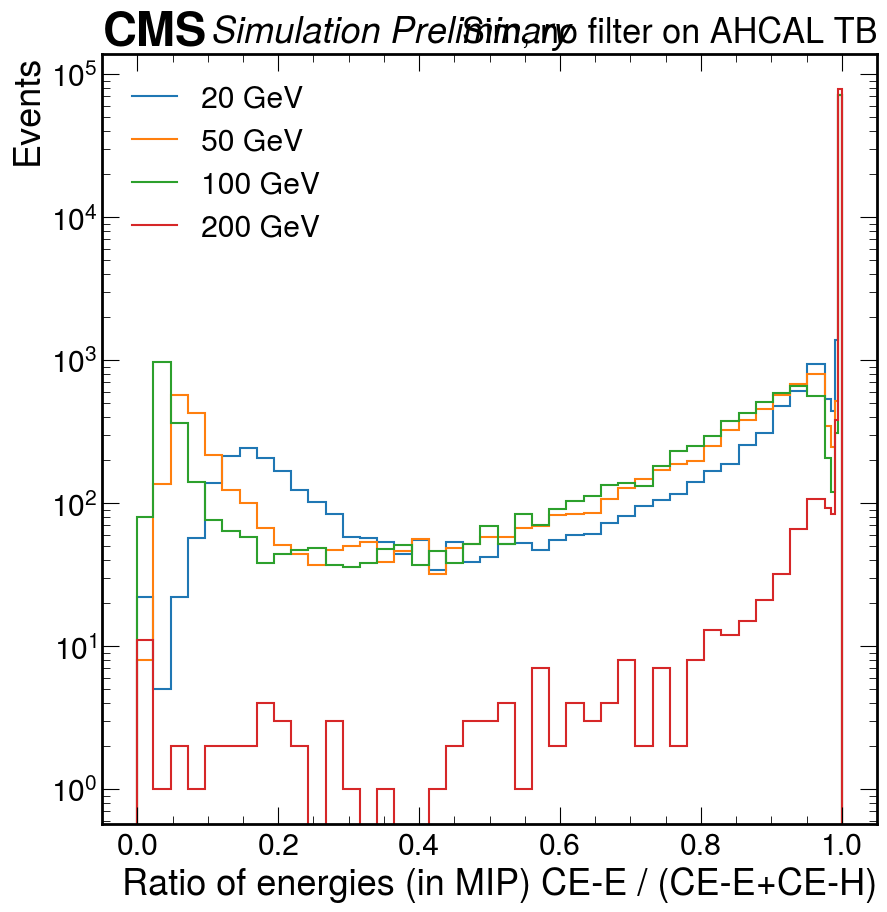

In [18]:
makeMultiBeamEnergyPlots("v46", plotParams=dict(lumiText="Sim, no filter on AHCAL"))

  0%|          | 0/4 [00:00<?, ?it/s]/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/awkward/_backends/backend.py:47: RuntimeWarning: invalid value encountered in divide
  return getattr(ufunc, method)(*args, **kwargs)
100%|██████████| 4/4 [00:22<00:00,  5.60s/it]


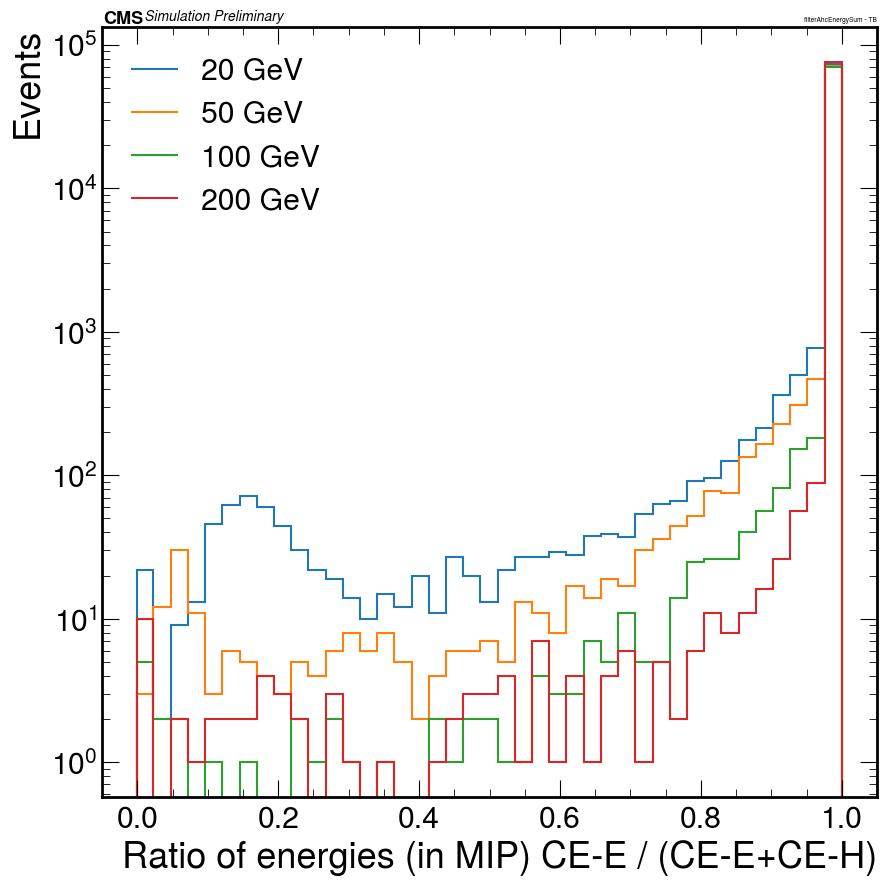

In [21]:
makeMultiBeamEnergyPlots("v46", ratioCompParam=dict(filterAhcEnergySum=True), plotParams=dict(lumiText="filterAhcEnergySum -"))